In [52]:
import legume


import legume.utils
import numpy as np
import matplotlib.pyplot as plt

In [53]:
D = 1.2
r = 0.2
epsr = 12.0

N=42

In [54]:
# Initialize a lattice (can be 'square', 'hexagonal', or defined by primitive vectors)
lattice = legume.Lattice('square')
shape = legume.Circle(eps=epsr, x_cent=0, y_cent=0, r=0.3)


layer = legume.ShapesLayer(lattice)
layer.add_shape(shape)

(xb, yb) = lattice.xy_grid(Nx=N, Ny=N)

eps_dist=layer.get_eps(points=np.meshgrid(xb, yb))

In [55]:
phc =legume.PhotCryst(lattice)

phc.add_layer(d=D)

phc.add_shape(shape)

phc2= legume.PhotCryst(lattice)
phc2.add_layer(d=D, layer_type='freeform')

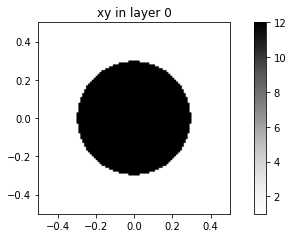

In [56]:
legume.viz.structure(phc)

In [57]:
phc2.initialize_ff_layer(eps_dist)

In [58]:
gme = legume.GuidedModeExp(phc, mode='grid',res=N)

gme2=legume.GuidedModeExp(phc2,mode='grid',res=N)

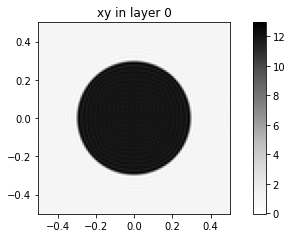

In [59]:
legume.viz.eps_ft(gme)

In [60]:
(xgr, ygr) = phc2.lattice.xy_grid(Nx=N, Ny=N)

ft_coeff = phc2.layers[-1].compute_ft(gme2._inds)

ftinv = legume.utils.ftinv(ft_coeff, gme2.gvec, xgr, ygr)

In [61]:
eps_inv = np.roll(np.roll(np.abs(ftinv),int(N/2), 0),int(N/2),1)

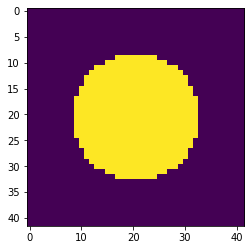

In [62]:
plt.imshow(eps_dist)

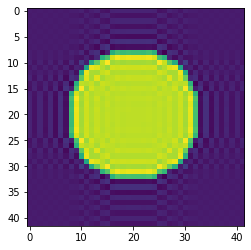

In [63]:
plt.imshow(eps_inv)

In [64]:
eps_ft_2=np.fft.fft2(eps_inv)

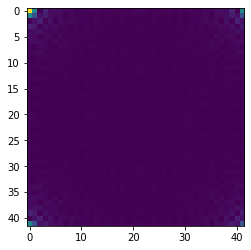

In [65]:
plt.imshow(np.abs(eps_ft_2))



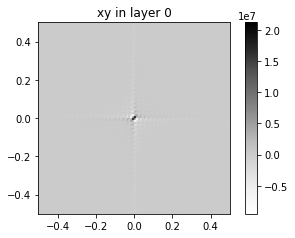

In [66]:
legume.viz.eps_ft(gme2)